In [6]:
!wget https://github.com/CSSEGISandData/COVID-19/archive/master.zip
!unzip master.zip

--2020-05-02 14:30:06--  https://github.com/CSSEGISandData/COVID-19/archive/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/CSSEGISandData/COVID-19/zip/master [following]
--2020-05-02 14:30:06--  https://codeload.github.com/CSSEGISandData/COVID-19/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61520356 (59M) [application/zip]
Saving to: ‘master.zip’

master.zip          100%[===================>]  58.67M   167MB/s    in 0.4s    

2020-05-02 14:30:07 (167 MB/s) - ‘master.zip’ saved [61520356/61520356]

Archive:  master.zip
df78742b57976079cad11110560ad6628742c134
replace COVID-19-master/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extrac

In [0]:
import pandas as pd
import numpy as np
import os, math

import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
root_path = 'COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/'

recent = sorted(os.listdir(root_path))[-2]
path = os.path.join(root_path, recent)
df = pd.read_csv(path)
print(df.shape)
display(df)
name = [c for c in df.columns if "Country" in c]
countries = df[name[0]].to_numpy()
countries = np.unique(countries) 
print(np.unique(countries))

(3188, 12)


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-02 02:32:27,34.223334,-82.461707,31,0,0,31,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-02 02:32:27,30.295065,-92.414197,133,10,0,123,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-02 02:32:27,37.767072,-75.632346,303,5,0,298,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-02 02:32:27,43.452658,-116.241552,681,16,0,665,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-02 02:32:27,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3183,NaN,NaN,NaN,West Bank and Gaza,2020-05-02 02:32:27,31.952200,35.233200,353,2,76,275,West Bank and Gaza
3184,NaN,NaN,NaN,Western Sahara,2020-05-02 02:32:27,24.215500,-12.885800,6,0,5,1,Western Sahara
3185,NaN,NaN,NaN,Yemen,2020-05-02 02:32:27,15.552727,48.516388,7,2,1,4,Yemen
3186,NaN,NaN,NaN,Zambia,2020-05-02 02:32:27,-13.133897,27.849332,109,3,74,32,Zambia


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [13]:
ts = {'Deaths': {}, 'Confirmed': {}}
for country in np.unique(countries):
  ts['Deaths'][country] = []
  ts['Confirmed'][country] = []

for k, csv in enumerate(sorted(os.listdir(root_path))):
  if not csv[-3:] == 'csv': continue
    
  path = os.path.join(root_path, csv)
  df = pd.read_csv(path)

  for country in np.unique(countries):
    try:
      name = [c for c in df.columns if "Country" in c]
      ts['Deaths'][country].append(df[df[name[0]].str.contains(country)].sum()['Deaths'])
      ts['Confirmed'][country].append(df[df[name[0]].str.contains(country)].sum()['Confirmed'])
    except:
      ts['Deaths'][country].append(0)
      ts['Confirmed'][country].append(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [15]:
df_deaths = pd.DataFrame.from_dict(ts['Deaths'])
df_deaths = df_deaths.sort_values(df_deaths.shape[0]-1, axis=1, ascending=False)
display(df_deaths.iloc[-1])

df_confirmed = pd.DataFrame.from_dict(ts['Confirmed'])
df_confirmed = df_confirmed.sort_values(df_confirmed.shape[0]-1, axis=1, ascending=False)
display(df_confirmed.iloc[-1])

US                          64943.0
Italy                       28236.0
United Kingdom              27583.0
France                      24628.0
Spain                       24543.0
                             ...   
Saint Lucia                     0.0
Bhutan                          0.0
Central African Republic        0.0
Fiji                            0.0
Cambodia                        0.0
Name: 100, Length: 187, dtype: float64

US                     1103461.0
Spain                   213435.0
Italy                   207428.0
United Kingdom          178685.0
France                  167305.0
                         ...    
Bhutan                       7.0
Western Sahara               6.0
Comoros                      1.0
Congo (Brazzaville)          0.0
Congo (Kinshasa)             0.0
Name: 100, Length: 187, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10


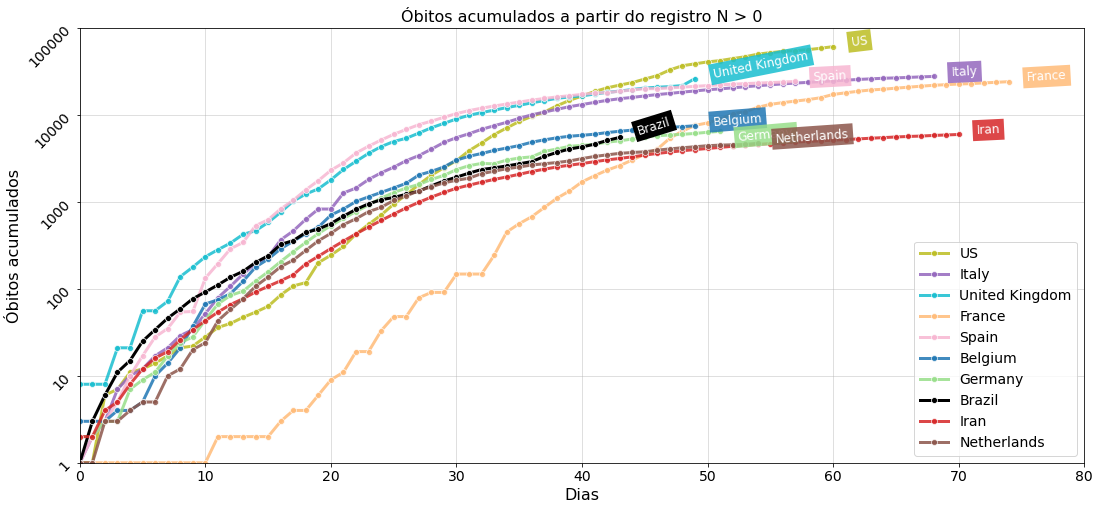

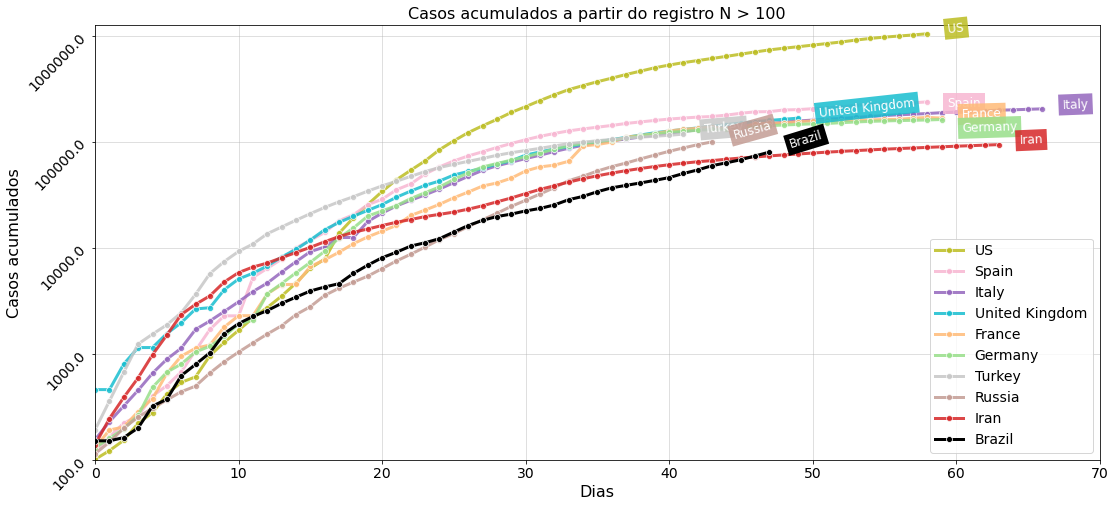

In [71]:
 def plot_log(info, title, xlim, ylim, inicio, countries, colors): 
  
  plt.close('all')
  valores = {}
  plt.figure(figsize=(18, 8))
  styles = ['dashed', 'solid', 'dotted', 'solid', 'dashdot']
 
  n = -1
  for k, country in enumerate(countries):
    valores[country] = [t for t in ts[info][country] if t > inicio]
    if len(valores[country]) == 0: continue
    if country == 'China': n = xlim
    else: n = -1
    y = len(valores[country][:n]) -0.1
    altura = np.log10(valores[country][:n])[-1]
    alpha = 0.85
    if country == 'Germany': altura -= 0.12
    if country == 'Brazil': 
      # altura += 0.05
      y -= 0.1
      alpha = 1
      colors[country] = [0, 0, 0, 1]
    p = sns.lineplot(np.arange(len(valores[country][:n-1])), np.log10(valores[country][:n-1]), label=country, linewidth=3, color=colors[country], alpha=alpha, marker='o', linestyle='solid')
    color = p.get_lines()[-1].get_color()

    dy = np.log10(valores[country][-2]) - np.log10(valores[country][-8]) 
    rot = max(0, math.atan2(dy,7))  * (180/math.pi) * 10
    t = plt.text(y-0.5, altura, country , fontsize=12, rotation=rot,color='w',alpha=1.,
                bbox=dict(facecolor=color, edgecolor='none', alpha=alpha))

  
  plt.xticks(fontsize=14)
  ticks = [str(10**i) for i in np.arange(0, ylim+1)]
  plt.yticks(np.arange(0, ylim+1), ticks, fontsize=14, rotation=46)
  plt.xlabel('Dias', fontsize=16)
  plt.ylabel(title + ' acumulados', fontsize=16)
  
  plt.title(title + ' acumulados a partir do registro N > ' + str(inicio), fontsize=16)
  plt.grid(True, alpha=0.5)
  
  plt.xlim(0, xlim)
  ylim_lower = max(0, np.floor(np.log10(inicio)) )
  plt.ylim(ylim_lower,ylim)
  plt.legend(fontsize=14, loc=4)
  
  plt.savefig(title+'.png', format='png', dpi=150, bbox_inches='tight')
  plt.show()

num_countries = 10

countries_deaths = df_deaths.columns.tolist()[:num_countries]
countries_confirmed = df_confirmed.columns.tolist()[:num_countries]

all_countries = np.unique(np.concatenate((countries_deaths,countries_confirmed),0))
colors = pl.cm.tab20(np.linspace(0,1,len(all_countries)+1))
# np.random.shuffle(colors)

color_dict = {}
for k, country in enumerate(all_countries):
  color_dict[country] = colors[k]


plot_log('Deaths', 'Óbitos', 80, 5, 0, countries_deaths, color_dict)

plot_log('Confirmed', 'Casos', 70, 6.1, 100, countries_confirmed, color_dict)